# Arquivos

## Importando Arquivos

In [ ]:
import pandas as pd

TRAIN_DIR = "../data/raw/analise-preditiva-de-comportamento-bancario/train.csv"
TEST_DIR = "../data/raw/analise-preditiva-de-comportamento-bancario/test.csv"
SAMPLE_DIR = "../data/raw/analise-preditiva-de-comportamento-bancario/sample_submission.csv"

train = pd.read_csv(TRAIN_DIR)
test = pd.read_csv(TEST_DIR)
sample = pd.read_csv(SAMPLE_DIR)

#print(f"Train shape: {train.shape}")
#print(f"Test shape: {test.shape}")

## Ajuste tema

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Inspect

In [ ]:
#train.head()
#train.info()
#train.describe()
'''
# Verificar valores faltantes
print("\nValores faltantes:")
print(train.isnull().sum())
'''
# Verificar duplicatas
print(f"\nDuplicatas: {train.duplicated().sum()}")

## Analisando a variável objetivo

In [ ]:
# Distribuição do target
print(train['y'].value_counts())
print(train['y'].value_counts(normalize=True))

In [ ]:
# Visualização
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Contagem
train['y'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Distribuição da Variável Target')
axes[0].set_xlabel('Adesão (0=Não, 1=Sim)')
axes[0].set_ylabel('Contagem')

# Proporção
train['y'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', ax=axes[1])

axes[1].set_title('Proporção de Adesão')
plt.tight_layout()
plt.show()

## Analisando variáveis numéricas

In [ ]:
# Variáveis numéricas
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Estatísticas descritivas por target
for col in numeric_cols:
    print(f"\n{col.upper()}")
    print(train.groupby('y')[col].describe())

## Analisando variáveis de categoria

In [ ]:
# Variáveis categóricas
categorical_cols = ['job', 'marital', 'education', 'default', 
                    'housing', 'loan', 'contact', 'month', 'poutcome']

# Taxa de conversão por categoria
for col in categorical_cols:
    conversion_rate = train.groupby(col)['y'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    print(f"\n{col.upper()} - Taxa de Conversão:")
    print(conversion_rate)

# Visualizações

## Matriz de Correlação

In [ ]:
# Matriz de correlação das variáveis numéricas
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']
correlation_matrix = train[numeric_cols].corr()

# Visualização
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlação com o target (ordenada)
print("\nCorrelação com o Target (y):")
target_corr = correlation_matrix['y'].drop('y').sort_values(ascending=False)
print(target_corr)

## Boxplots de Variáveis Numéricas por Target

In [ ]:
# Boxplots das principais variáveis numéricas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

numeric_features = ['age', 'balance', 'duration', 'campaign', 'previous', 'pdays']

for idx, col in enumerate(numeric_features):
    sns.boxplot(data=train, x='y', y=col, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'Distribuição de {col.upper()} por Target', fontweight='bold')
    axes[idx].set_xlabel('Adesão (0=Não, 1=Sim)')
    axes[idx].set_ylabel(col)
    
    # Adicionar média
    means = train.groupby('y')[col].mean()
    axes[idx].plot([0, 1], [means[0], means[1]], 'r--', linewidth=2, label='Média')
    axes[idx].legend()

plt.tight_layout()
plt.show()

# Estatísticas complementares
print("\nComparação de Médias por Target:")
for col in numeric_features:
    print(f"\n{col.upper()}:")
    print(train.groupby('y')[col].agg(['mean', 'median', 'std']))


 ## Barplots de Taxa de Conversão por Categoria

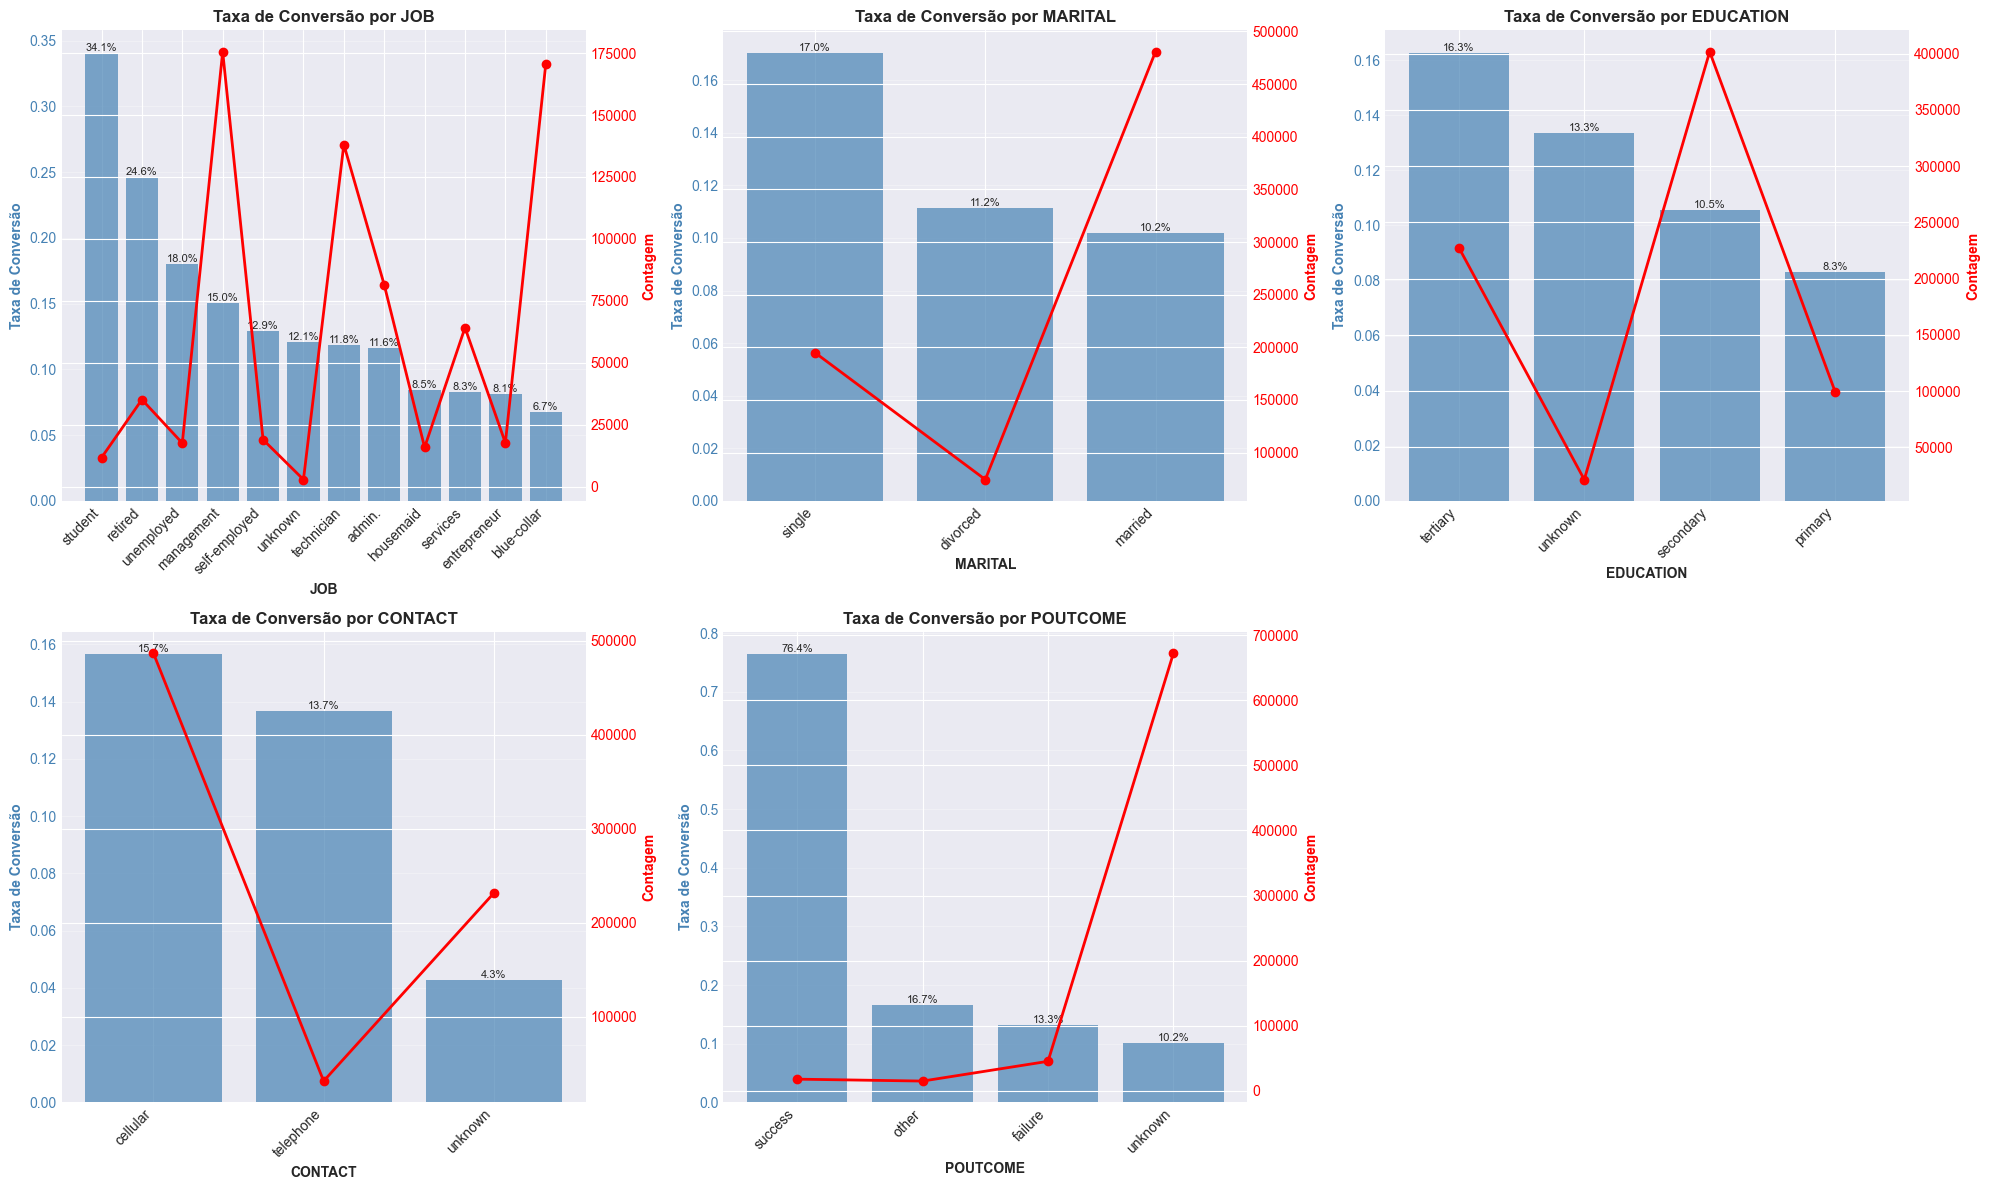


Resumo de Taxa de Conversão por Categoria:

JOB:
              Taxa_Conversão  Contagem
job                                   
student               34.08%     11767
retired               24.62%     35185
unemployed            17.98%     17634
management            15.04%    175541
self-employed         12.94%     19020
unknown               12.07%      2917
technician            11.83%    138107
admin.                11.65%     81492
housemaid              8.47%     15912
services               8.27%     64209
entrepreneur           8.14%     17718
blue-collar            6.74%    170498

MARITAL:
         Taxa_Conversão  Contagem
marital                          
single           17.05%    194834
divorced         11.16%     74407
married          10.19%    480759

EDUCATION:
          Taxa_Conversão  Contagem
education                         
tertiary          16.26%    227508
unknown           13.34%     21299
secondary         10.55%    401683
primary            8.31%     99510

C

In [15]:
# Taxa de conversão para variáveis categóricas
categorical_cols = ['job', 'marital', 'education', 'contact', 'poutcome']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    # Calcular taxa de conversão e contagem
    conversion_data = train.groupby(col).agg({
        'y': ['mean', 'count']
    }).reset_index()
    conversion_data.columns = [col, 'conversion_rate', 'count']
    conversion_data = conversion_data.sort_values('conversion_rate', ascending=False)
    
    # Criar barplot com dois eixos Y
    ax1 = axes[idx]
    ax2 = ax1.twinx()
    
    # Barras de conversão
    bars = ax1.bar(range(len(conversion_data)), 
                   conversion_data['conversion_rate'], 
                   alpha=0.7, 
                   color='steelblue',
                   label='Taxa de Conversão')
    
    # Linha de contagem
    line = ax2.plot(range(len(conversion_data)), 
                    conversion_data['count'], 
                    'ro-', 
                    linewidth=2,
                    markersize=6,
                    label='Contagem')
    
    # Configurações
    ax1.set_xlabel(col.upper(), fontweight='bold')
    ax1.set_ylabel('Taxa de Conversão', color='steelblue', fontweight='bold')
    ax2.set_ylabel('Contagem', color='red', fontweight='bold')
    ax1.set_title(f'Taxa de Conversão por {col.upper()}', fontsize=12, fontweight='bold')
    ax1.set_xticks(range(len(conversion_data)))
    ax1.set_xticklabels(conversion_data[col], rotation=45, ha='right')
    ax1.tick_params(axis='y', labelcolor='steelblue')
    ax2.tick_params(axis='y', labelcolor='red')
    ax1.grid(axis='y', alpha=0.3)
    
    # Adicionar valores nas barras
    for i, (rate, count) in enumerate(zip(conversion_data['conversion_rate'], 
                                           conversion_data['count'])):
        ax1.text(i, rate, f'{rate:.1%}', ha='center', va='bottom', fontsize=8)

# Remover subplot extra
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

# Tabela resumo
print("\nResumo de Taxa de Conversão por Categoria:")
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    summary = train.groupby(col)['y'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    summary.columns = ['Taxa_Conversão', 'Contagem']
    summary['Taxa_Conversão'] = summary['Taxa_Conversão'].apply(lambda x: f"{x:.2%}")
    print(summary)


## Distribuição Temporal (Day, Month)

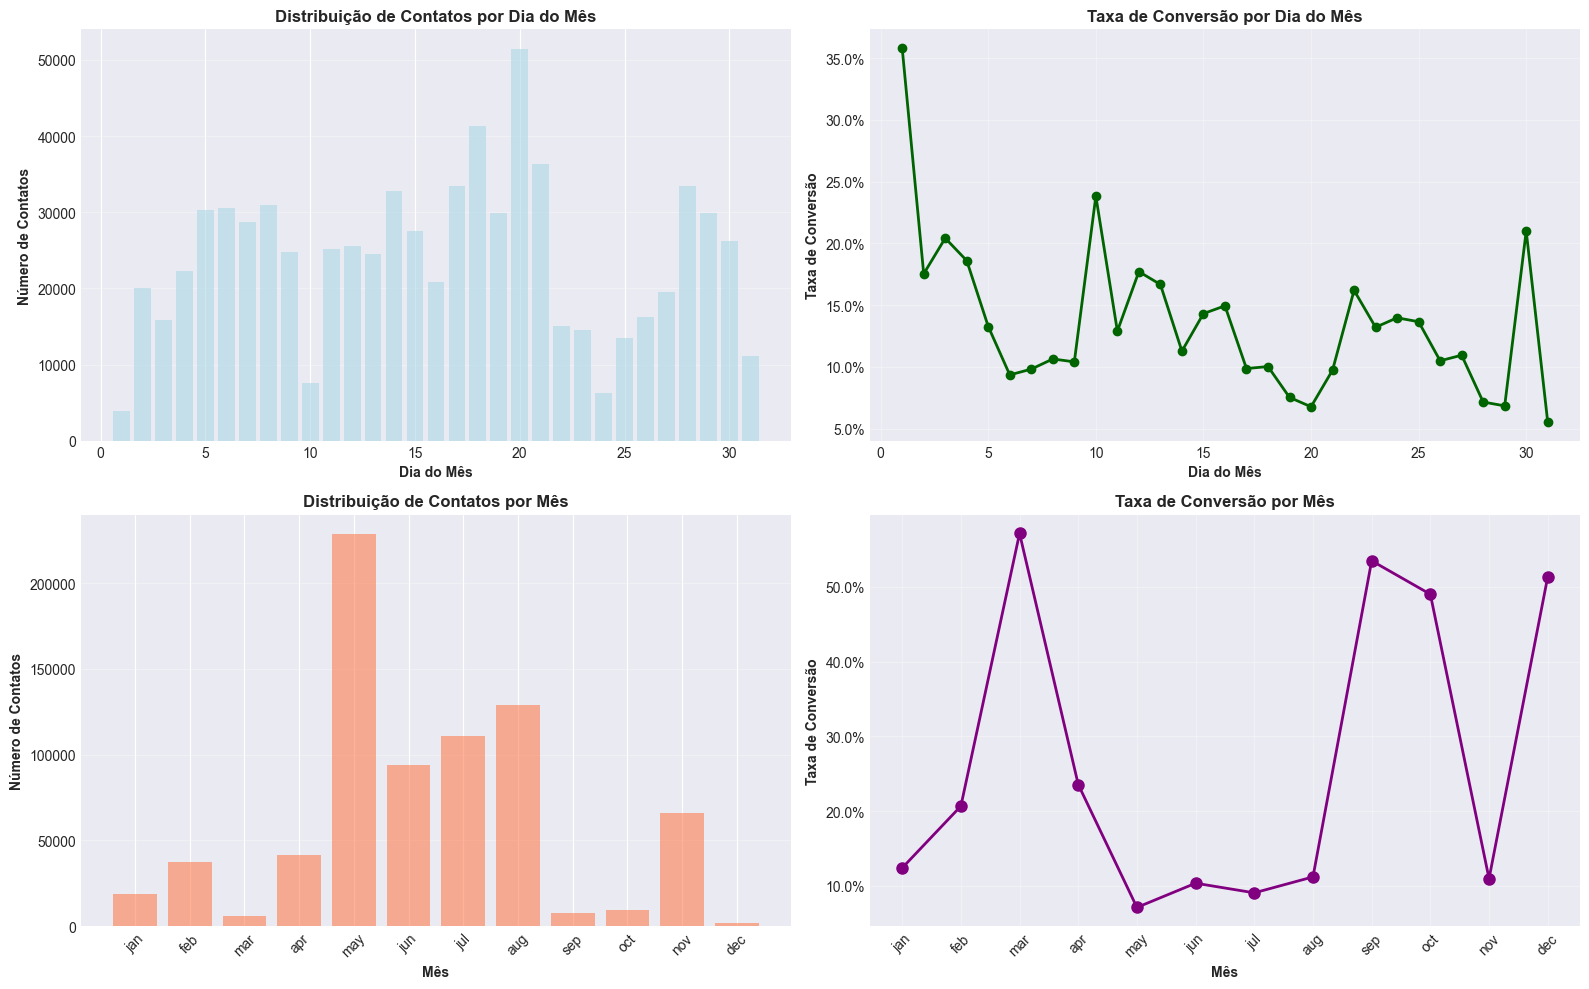


Estatísticas Temporais:

Por Mês:
   month  conversion_rate   count
4    jan         0.124148   18937
3    feb         0.206801   37611
7    mar         0.571355    5802
0    apr         0.235654   41319
8    may         0.071354  228411
6    jun         0.103726   93670
5    jul         0.090847  110647
1    aug         0.112161  128859
11   sep         0.534755    7409
10   oct         0.490004    9204
9    nov         0.109806   66062
2    dec         0.513291    2069

Melhor mês (conversão): mar
Pior mês (conversão): may


In [16]:
# Análise temporal
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 4.1 Distribuição por dia do mês
day_stats = train.groupby('day').agg({
    'y': ['mean', 'count']
}).reset_index()
day_stats.columns = ['day', 'conversion_rate', 'count']

axes[0, 0].bar(day_stats['day'], day_stats['count'], alpha=0.6, color='lightblue')
axes[0, 0].set_xlabel('Dia do Mês', fontweight='bold')
axes[0, 0].set_ylabel('Número de Contatos', fontweight='bold')
axes[0, 0].set_title('Distribuição de Contatos por Dia do Mês', fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

axes[0, 1].plot(day_stats['day'], day_stats['conversion_rate'], 'o-', linewidth=2, markersize=6, color='darkgreen')
axes[0, 1].set_xlabel('Dia do Mês', fontweight='bold')
axes[0, 1].set_ylabel('Taxa de Conversão', fontweight='bold')
axes[0, 1].set_title('Taxa de Conversão por Dia do Mês', fontweight='bold')
axes[0, 1].grid(alpha=0.3)
axes[0, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1%}'))

# 4.2 Distribuição por mês
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

month_stats = train.groupby('month').agg({
    'y': ['mean', 'count']
}).reset_index()
month_stats.columns = ['month', 'conversion_rate', 'count']
month_stats['month'] = pd.Categorical(month_stats['month'], categories=month_order, ordered=True)
month_stats = month_stats.sort_values('month')

axes[1, 0].bar(range(len(month_stats)), month_stats['count'], alpha=0.6, color='coral')
axes[1, 0].set_xlabel('Mês', fontweight='bold')
axes[1, 0].set_ylabel('Número de Contatos', fontweight='bold')
axes[1, 0].set_title('Distribuição de Contatos por Mês', fontweight='bold')
axes[1, 0].set_xticks(range(len(month_stats)))
axes[1, 0].set_xticklabels(month_stats['month'], rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

axes[1, 1].plot(range(len(month_stats)), month_stats['conversion_rate'], 'o-', 
                linewidth=2, markersize=8, color='purple')
axes[1, 1].set_xlabel('Mês', fontweight='bold')
axes[1, 1].set_ylabel('Taxa de Conversão', fontweight='bold')
axes[1, 1].set_title('Taxa de Conversão por Mês', fontweight='bold')
axes[1, 1].set_xticks(range(len(month_stats)))
axes[1, 1].set_xticklabels(month_stats['month'], rotation=45)
axes[1, 1].grid(alpha=0.3)
axes[1, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1%}'))

plt.tight_layout()
plt.show()

# Estatísticas
print("\nEstatísticas Temporais:")
print("\nPor Mês:")
print(month_stats)
print(f"\nMelhor mês (conversão): {month_stats.loc[month_stats['conversion_rate'].idxmax(), 'month']}")
print(f"Pior mês (conversão): {month_stats.loc[month_stats['conversion_rate'].idxmin(), 'month']}")


## Análise de Campanhas (campaign, previous, pdays)


Clientes NÃO contatados anteriormente (pdays=-1): 672434 (89.7%)
Clientes contatados anteriormente (pdays≠-1): 77566 (10.3%)

Taxa de conversão - Não contatados: 10.19%
Taxa de conversão - Contatados: 28.32%


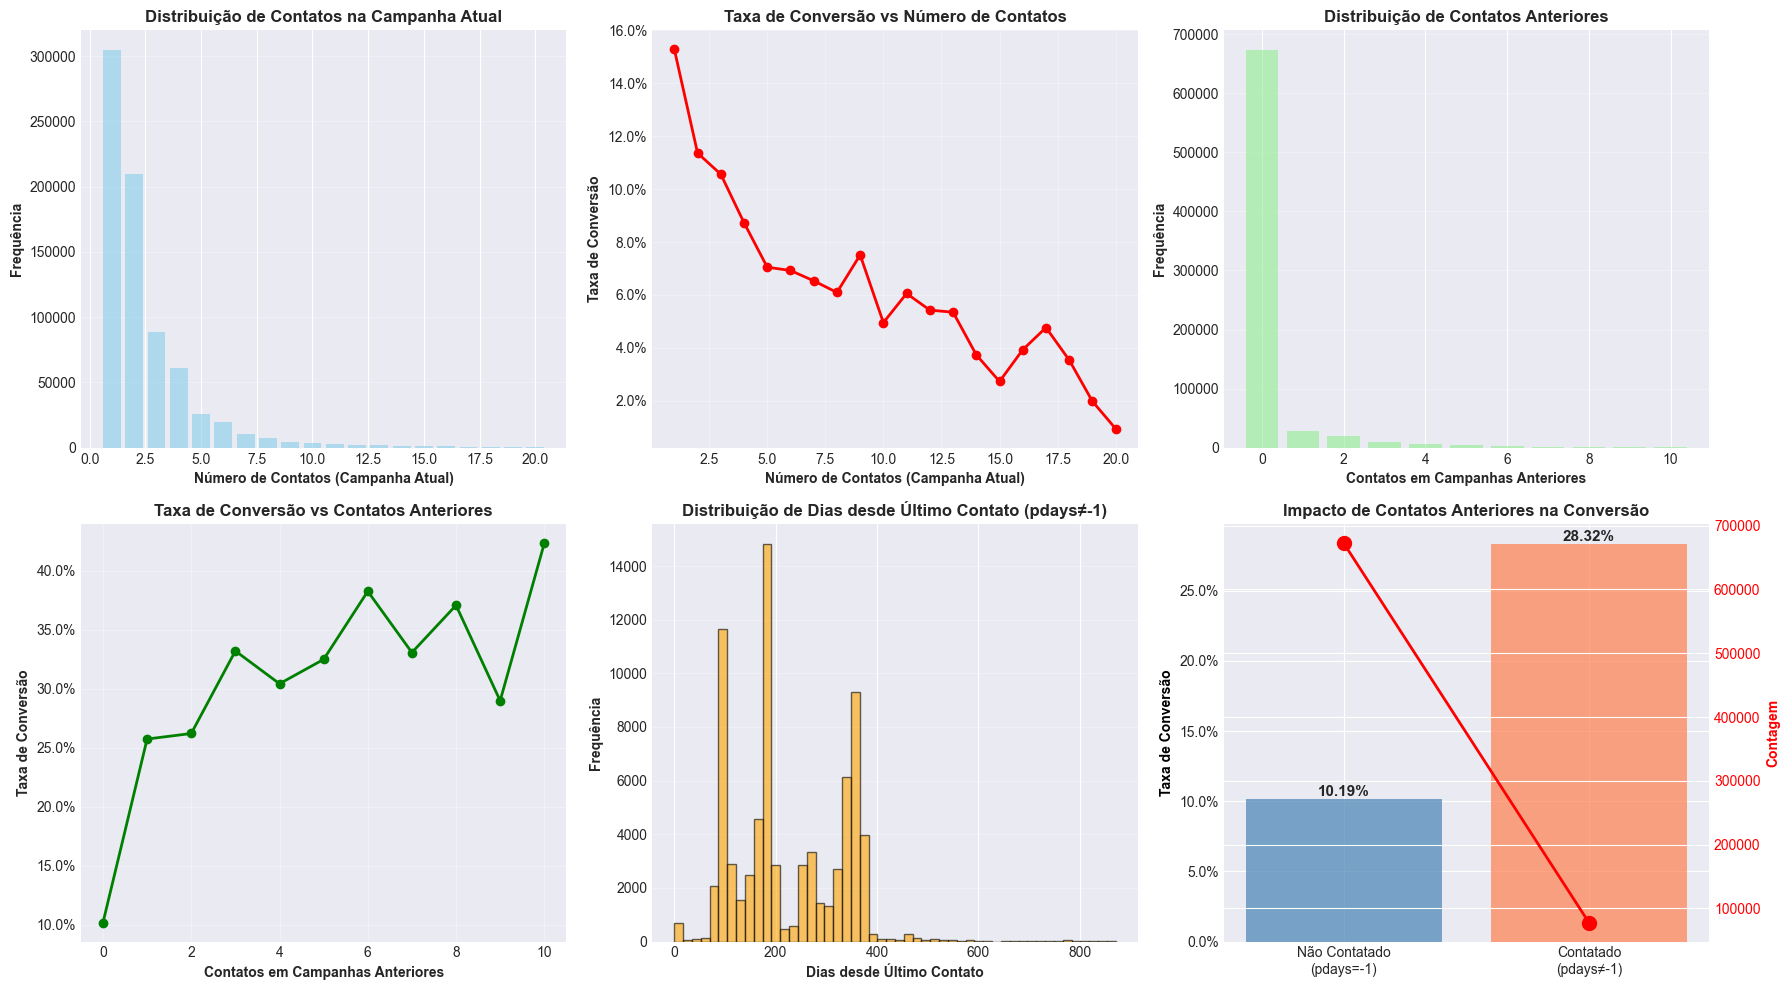


RESUMO DA ANÁLISE DE CAMPANHAS

Média de contatos na campanha atual: 2.58
Mediana de contatos na campanha atual: 2
Máximo de contatos na campanha atual: 63

Média de contatos anteriores: 0.30
Clientes sem contatos anteriores: 672431 (89.7%)

Taxa de conversão por número de contatos na campanha atual:
campaign
1     15.28%
2     11.36%
3     10.56%
4      8.73%
5      7.05%
6      6.93%
7      6.53%
8      6.09%
9      7.51%
10     4.96%
Name: y, dtype: object


In [ ]:
# Análise de campanhas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 5.1 Número de contatos na campanha atual
campaign_stats = train.groupby('campaign')['y'].agg(['mean', 'count']).reset_index()
campaign_stats_filtered = campaign_stats[campaign_stats['campaign'] <= 20]  # Filtrar outliers para visualização

axes[0, 0].bar(campaign_stats_filtered['campaign'], campaign_stats_filtered['count'], alpha=0.6, color='skyblue')
axes[0, 0].set_xlabel('Número de Contatos (Campanha Atual)', fontweight='bold')
axes[0, 0].set_ylabel('Frequência', fontweight='bold')
axes[0, 0].set_title('Distribuição de Contatos na Campanha Atual', fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

axes[0, 1].plot(campaign_stats_filtered['campaign'], campaign_stats_filtered['mean'], 'o-', 
                linewidth=2, markersize=6, color='red')
axes[0, 1].set_xlabel('Número de Contatos (Campanha Atual)', fontweight='bold')
axes[0, 1].set_ylabel('Taxa de Conversão', fontweight='bold')
axes[0, 1].set_title('Taxa de Conversão vs Número de Contatos', fontweight='bold')
axes[0, 1].grid(alpha=0.3)
axes[0, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1%}'))

# 5.2 Contatos em campanhas anteriores
previous_stats = train.groupby('previous')['y'].agg(['mean', 'count']).reset_index()
previous_stats_filtered = previous_stats[previous_stats['previous'] <= 10]

axes[0, 2].bar(previous_stats_filtered['previous'], previous_stats_filtered['count'], alpha=0.6, color='lightgreen')
axes[0, 2].set_xlabel('Contatos em Campanhas Anteriores', fontweight='bold')
axes[0, 2].set_ylabel('Frequência', fontweight='bold')
axes[0, 2].set_title('Distribuição de Contatos Anteriores', fontweight='bold')
axes[0, 2].grid(axis='y', alpha=0.3)

# 5.3 Taxa de conversão por previous
axes[1, 0].plot(previous_stats_filtered['previous'], previous_stats_filtered['mean'], 'o-', 
                linewidth=2, markersize=6, color='green')
axes[1, 0].set_xlabel('Contatos em Campanhas Anteriores', fontweight='bold')
axes[1, 0].set_ylabel('Taxa de Conversão', fontweight='bold')
axes[1, 0].set_title('Taxa de Conversão vs Contatos Anteriores', fontweight='bold')
axes[1, 0].grid(alpha=0.3)
axes[1, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1%}'))

# 5.4 Análise de pdays
# -1 significa que o cliente não foi contatado anteriormente
pdays_contacted = train[train['pdays'] != -1]
pdays_not_contacted = train[train['pdays'] == -1]

print(f"\nClientes NÃO contatados anteriormente (pdays=-1): {len(pdays_not_contacted)} ({len(pdays_not_contacted)/len(train):.1%})")
print(f"Clientes contatados anteriormente (pdays≠-1): {len(pdays_contacted)} ({len(pdays_contacted)/len(train):.1%})")
print(f"\nTaxa de conversão - Não contatados: {pdays_not_contacted['y'].mean():.2%}")
print(f"Taxa de conversão - Contatados: {pdays_contacted['y'].mean():.2%}")

# Distribuição de pdays (apenas contatados)
axes[1, 1].hist(pdays_contacted['pdays'], bins=50, alpha=0.6, color='orange', edgecolor='black')
axes[1, 1].set_xlabel('Dias desde Último Contato', fontweight='bold')
axes[1, 1].set_ylabel('Frequência', fontweight='bold')
axes[1, 1].set_title('Distribuição de Dias desde Último Contato (pdays≠-1)', fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

# 5.5 Comparação: contatado vs não contatado
contact_comparison = pd.DataFrame({
    'Grupo': ['Não Contatado\n(pdays=-1)', 'Contatado\n(pdays≠-1)'],
    'Taxa_Conversão': [pdays_not_contacted['y'].mean(), pdays_contacted['y'].mean()],
    'Contagem': [len(pdays_not_contacted), len(pdays_contacted)]
})

ax1 = axes[1, 2]
ax2 = ax1.twinx()

bars = ax1.bar(contact_comparison['Grupo'], contact_comparison['Taxa_Conversão'], 
               alpha=0.7, color=['steelblue', 'coral'])
line = ax2.plot(contact_comparison['Grupo'], contact_comparison['Contagem'], 
                'ro-', linewidth=2, markersize=10, label='Contagem')

ax1.set_ylabel('Taxa de Conversão', color='black', fontweight='bold')
ax2.set_ylabel('Contagem', color='red', fontweight='bold')
ax1.set_title('Impacto de Contatos Anteriores na Conversão', fontweight='bold')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1%}'))
ax2.tick_params(axis='y', labelcolor='red')

# Adicionar valores
for i, (bar, val) in enumerate(zip(bars, contact_comparison['Taxa_Conversão'])):
    ax1.text(bar.get_x() + bar.get_width()/2, val, f'{val:.2%}', 
             ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

# Estatísticas resumidas
print("\n" + "="*60)
print("RESUMO DA ANÁLISE DE CAMPANHAS")
print("="*60)
print(f"\nMédia de contatos na campanha atual: {train['campaign'].mean():.2f}")
print(f"Mediana de contatos na campanha atual: {train['campaign'].median():.0f}")
print(f"Máximo de contatos na campanha atual: {train['campaign'].max():.0f}")

print(f"\nMédia de contatos anteriores: {train['previous'].mean():.2f}")
print(f"Clientes sem contatos anteriores: {(train['previous'] == 0).sum()} ({(train['previous'] == 0).mean():.1%})")

print(f"\nTaxa de conversão por número de contatos na campanha atual:")
print(train.groupby('campaign')['y'].mean().head(10).apply(lambda x: f"{x:.2%}"))